#### Sammy Stollman

# Compartmental Models in Mathematical Epidemiology

#### Project created in April 2023 for my Applied Math class. The goal was to compute, explain, and graphically display a compartmental model to look at how diseases spread through a population. The model divides people into groups like susceptible, infected, and recovered. I found it interesting to see how tweaking certain variables affected other variables as well as the overall population. I was able to learn and apply many differential equations and mathematical modeling concepts learned in class.

# A

The rate of change of the infectious individuals is equal to the negative rate of change of susceptible individuals minus the recovery rate multiplied by the number of infected individuals. The infected population changes negatively proportional to the suceptible population minus the recovered population. This makes sense because all of the populations(S, I, and R) are part of a larger total population.

# B.

In [2]:
import math



s = [.99]
r = [0]
i = [.01]
t = [0]

beta = 1
gamma = .2

dt = .1

def dsdt(beta,i,s):
    return -(beta*i*s)

def drdt(gamma,i):
    return gamma*i

def didt(beta,i,s,gamma):
    return -dsdt(beta,i,s)-drdt(gamma,i)



In [3]:
for k in range(300):
    s.append(s[k]+dsdt(beta,i[k],s[k])*dt)
    i.append(i[k]+didt(beta,i[k],s[k],gamma)*dt)
    r.append(r[k]+drdt(gamma, i[k])*dt)
    t.append(t[k]+dt)

Text(0, 0.5, 'Fraction of population')

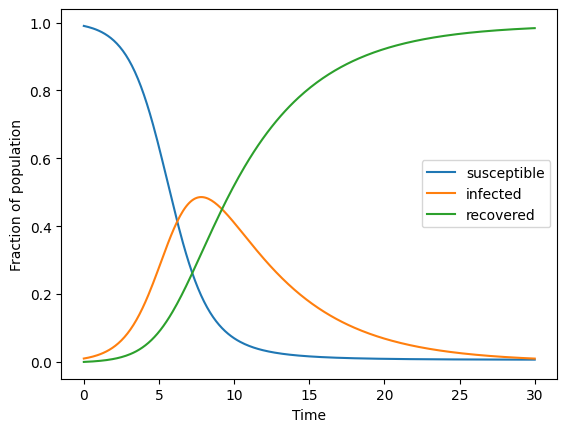

In [4]:
import matplotlib.pyplot as plt
plt.plot(t,s,label = "susceptible")
plt.plot(t,i,label = "infected")
plt.plot(t,r,label = "recovered")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Fraction of population")

This is an SIR model that begins with 99 percent of our population suceptible to disease and 1 percent of our population infected. The graph shows over a 30 day time period how the populations change based on the constants given. Beta is equal to 1 which determines how fast people get infected. Gamma, on the other hand, is equal to .2 which determines how fast people recover.

# C.

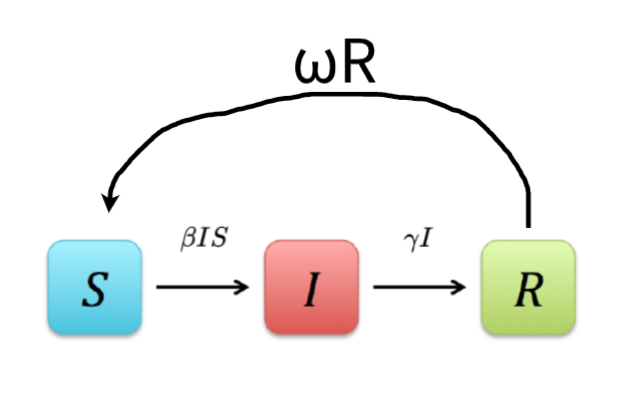

In [160]:
omega = 1
beta = 1
gamma = .2

In [164]:
s = [.99]
r = [0]
i = [.01]
t = [0]


def dsdt(beta,i,s,omega,r):
    return -(beta*i*s)+omega*r

def drdt(gamma,i,omega,r):
    return gamma*i-omega*r

def didt(beta,i,s,gamma,omega,r):
    return -dsdt(beta,i,s,omega,r)-drdt(gamma,i,omega,r)

In [165]:
for k in range(300):
    s.append(s[k]+dsdt(beta,i[k],s[k],omega,r[k])*dt)
    i.append(i[k]+didt(beta,i[k],s[k],gamma,omega,r[k])*dt)
    r.append(r[k]+drdt(gamma, i[k],omega,r[k])*dt)
    t.append(t[k]+dt)

Text(0, 0.5, 'Fraction of population')

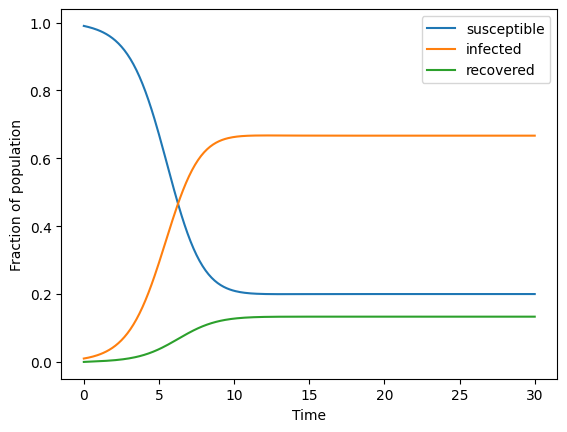

In [166]:
import matplotlib.pyplot as plt
plt.plot(t,s,label = "susceptible")
plt.plot(t,i,label = "infected")
plt.plot(t,r,label = "recovered")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Fraction of population")

In [72]:
r0 = beta/gamma
print(r0)

5.0


This is a SIRS model. Very similar to the SIR model, but even after someone is recovered, they can become infected again. This graph shows the change of our population over 30 days. It starts with 99 percent of people seceptible and 1 percent infected. It changes based on beta equal to 1, gamma equal to .2, and omega (frequency of infected after recovered) also equal to 1.

# D.

In [73]:
s = [.99]
r = [0]
i = [.01]
t = [0]
mu = 1/(76*365)
#mu = 1/365 #Death frequency

d = [0]
beta = .21 #Infection frequency
gamma = 1/14 #Recovered frequency
omega = 1/365 #Infection after recovered frequency
dt=.1

def dddt(i):
    return i*mu

def dsdt(i,s,r):
    return -(beta*i*s)+omega*r

def drdt(i,r):
    return gamma*i-omega*r

def didt(i,s,r):
    return -dsdt(i,s,r)-drdt(i,r)-dddt(i)



In [74]:
total = [1]
for k in range(900):
    s.append(s[k]+dsdt(i[k],s[k],r[k])*dt)
    i.append(i[k]+didt(i[k],s[k],r[k])*dt)
    r.append(r[k]+drdt(i[k],r[k])*dt)
    d.append(d[k]+dddt(i[k])*dt)
    t.append(t[k]+dt)
    total.append(s[k]+i[k]+r[k]+d[k])

Text(0, 0.5, 'Fraction of population')

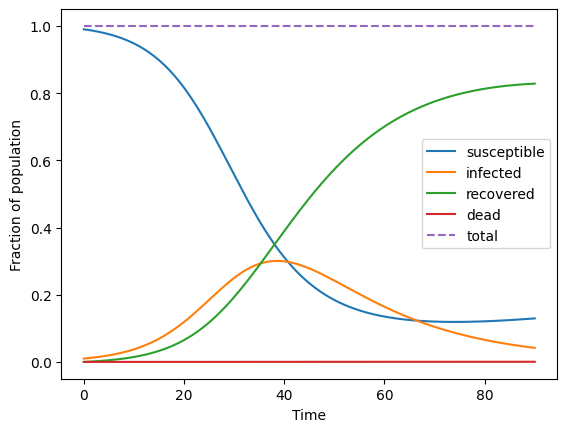

In [75]:
import matplotlib.pyplot as plt
plt.plot(t,s,label = "susceptible")
plt.plot(t,i,label = "infected")
plt.plot(t,r,label = "recovered")
plt.plot(t,d,label = "dead")
plt.plot(t,total,label = "total",linestyle = "dashed")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Fraction of population")

In [76]:
r0=beta/gamma
print(r0)

2.94


In [8]:
s = [.99]
r = [0]
i = [.01]
t = [0]
#mu = 1/(76*365)
mu = 1/240 #Death frequency

d = [0]
beta = .21 #Infection frequency
gamma = 1/14 #Recovered frequency
omega = 1/365 #Infection after recovered frequency
dt=.1

def dddt(i):
    return i*mu

def dsdt(i,s,r):
    return -(beta*i*s)+omega*r

def drdt(i,r):
    return gamma*i-omega*r

def didt(i,s,r):
    return -dsdt(i,s,r)-drdt(i,r)-dddt(i)


In [9]:
total = [1]
for k in range(900):
    s.append(s[k]+dsdt(i[k],s[k],r[k])*dt)
    i.append(i[k]+didt(i[k],s[k],r[k])*dt)
    r.append(r[k]+drdt(i[k],r[k])*dt)
    d.append(d[k]+dddt(i[k])*dt)
    t.append(t[k]+dt)
    total.append(s[k]+i[k]+r[k]+d[k])

Text(0, 0.5, 'Fraction of population')

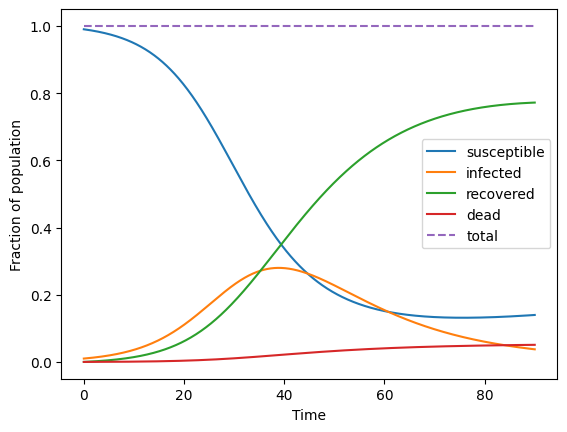

In [10]:
import matplotlib.pyplot as plt
plt.plot(t,s,label = "susceptible")
plt.plot(t,i,label = "infected")
plt.plot(t,r,label = "recovered")
plt.plot(t,d,label = "dead")
plt.plot(t,total,label = "total",linestyle = "dashed")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Fraction of population")

The graph above shows what happens when 1/20 of our infected population die after infection.<br><br>
As time passes, the fraction of suceptible members of our population decreases. We start with 99 percent of our population susceptible and it decreases based on our infection frequency multiplied by our suceptible population multiplied by our infected population. The higher our infection frequency (beta), the faster our suceptible population decreases.<br><br>
The recovered change based on who has been infected (times the recovered frequency) and who has already recovered (times the infection after recovery frequency). <br><br> The infected change based on all of the other variables assuming our fraction of population total stays at 1. <br><br> The dead changes based on the current infected number and the death frequency (mu).


# E.

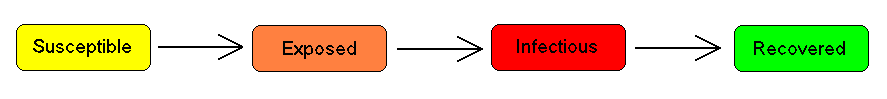

The SEIR model is very similar to the other models explored in this project, but it takes away the assumption that if someone is susceptible, they are automatically exposed. Now we add an exposed line to our graph that changes how our model looks based on some constant (a). The constant a is called the latency period of a disease.

In [175]:
s = [.99]
e = [0]
i = [.01]
r = [0]
d = [0]

t = [0]
#mu = 1/(76*365)
mu = .07 #Death frequency
beta = 1 #Infection frequency
gamma = 0.01 #Recovered frequency
omega = 1/365 #Infection after recovered frequency
a = .05 #Exposed frequency (latency period)
dt=.1

# def dddt(i):
#     return i*mu

def dsdt(i,s):
    return -beta*s*i

def dedt(i,s,e):
    return beta*i*s-a*e

def didt(i,e):
    return a*e-gamma*i

def drdt(i,r):
    return gamma*i

In [176]:
total = [1]
for k in range(900):
    s.append(s[k]+dsdt(i[k],s[k])*dt)
    e.append(e[k]+dedt(i[k],s[k],e[k])*dt)
    i.append(i[k]+didt(i[k],e[k])*dt)
    r.append(r[k]+drdt(i[k],r[k])*dt)
#     d.append(d[k]+dddt(i[k])*dt)
    t.append(t[k]+dt)
    total.append(s[k]+i[k]+e[k]+r[k])

Text(0, 0.5, 'Fraction of population')

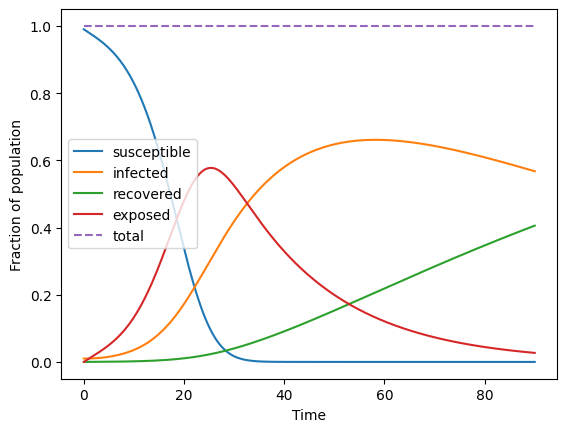

In [177]:
import matplotlib.pyplot as plt
plt.plot(t,s,label = "susceptible")
plt.plot(t,i,label = "infected")
plt.plot(t,r,label = "recovered")
plt.plot(t,e,label = "exposed")
# plt.plot(t,d,label = "dead")
plt.plot(t,total,label = "total",linestyle = "dashed")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Fraction of population")

The graph above is an example of the SEIR model showing our change in population over 90 days. It starts with 99 percent of the population susceptible and 1 percent infected. Beta is equal to 1 so the entire population is bound to get infected and gamma is 0.05 so a small portion of the population recovers. My variable called a is equal to .05 which affects exposure and infection. The higher a is, the steeper the infected curve is and the peak of the exposure curve is shorter. This is because exposure relies on how many people are susceptible and how many people have already been infected. With beta equal to 1, there is no chance for the entire population to get exposed before they get infected.

In [179]:
R0 = beta*a/gamma*a
print(R0)

0.25
